

## Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [17]:
import numpy as np
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [18]:
filename = "training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

In [19]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

In [21]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()


Train Images:


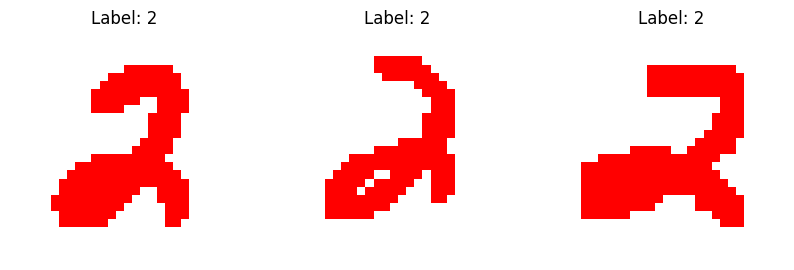

Test Images 1:


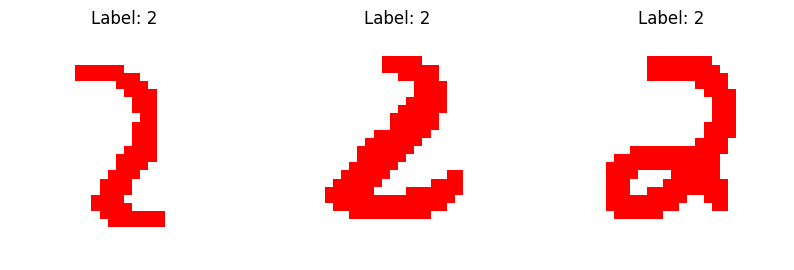

Test Images 2:


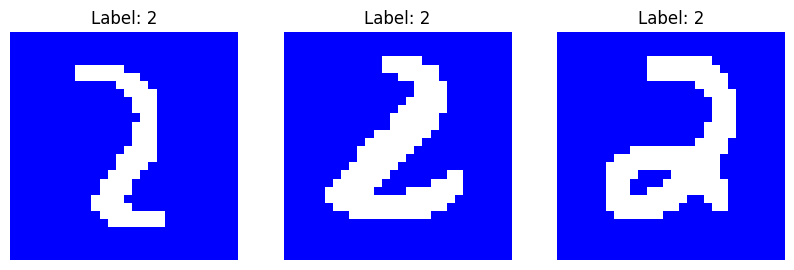

In [22]:
# Plotting three images from the dataset
def plot_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()


print("Train Images:")
plot_images(train_images, train_digits)

print("Test Images 1:")
plot_images(test_images_1, test_digits_1)

print("Test Images 2:")
plot_images(test_images_2, test_digits_2)

In [23]:
print(train_images.shape)
print(test_images_1.shape)
print(test_images_2.shape)

(2726, 28, 28, 3)
(3147, 28, 28, 3)
(3147, 28, 28, 3)


In [24]:
blue_pixels = np.all(test_images_2 == [0, 0, 1], axis=-1)
white_pixels = np.all(test_images_2 == [1, 1, 1], axis=-1)
test_images_2[blue_pixels] = [1, 1, 1]
test_images_2[white_pixels]=[1,0,0]

Test Images 2:


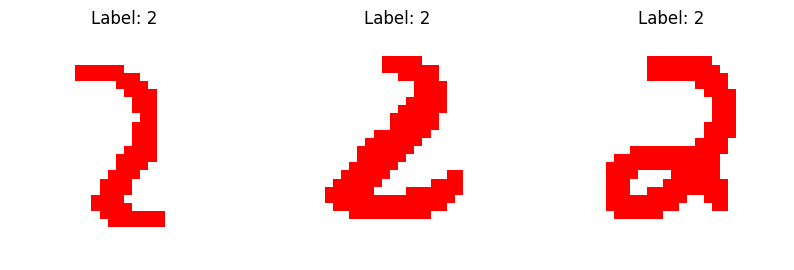

In [25]:
print("Test Images 2:")
plot_images(test_images_2, test_digits_2)

In [16]:
# Flattening images
train_images_flatten = train_images.reshape((train_images.shape[0], -1))
test_images_1_flatten = test_images_1.reshape((test_images_1.shape[0], -1))
test_images_2_flatten = test_images_2.reshape((test_images_2.shape[0], -1))

# Normalizing data
train_images_flatten = train_images_flatten / 255.0
test_images_1_flatten = test_images_1_flatten / 255.0
test_images_2_flatten = test_images_2_flatten / 255.0

# Defining and training MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,20,), max_iter=1000, activation='relu', solver='adam', random_state=42)
mlp.fit(train_images_flatten, train_digits)

pred_test1 = mlp.predict(test_images_1_flatten)
pred_test2 = mlp.predict(test_images_2_flatten)

accuracy_test1 = accuracy_score(test_digits_1, pred_test1)
accuracy_test2 = accuracy_score(test_digits_2, pred_test2)

print("Accuracy on Test Set 1:", accuracy_test1)
print("Accuracy on Test Set 2:", accuracy_test2)


Accuracy on Test Set 1: 1.0
Accuracy on Test Set 2: 0.3279313632030505


Observation:- The MLP's challenges with color sensitivity and poor performance on diverse test sets suggest it heavily depends on color rather than digit shapes. This highlights the importance of enhancing feature representation and data diversity during training. The strategy of aligning colors in test set 2 with those in test set 1 boosted accuracy from 0% to 32%, indicating that color normalization can partially alleviate the model's color sensitivity. However, this also underscores the model's tendency to prioritize color features over structural digit features. Moreover, the model's susceptibility to shortcut learning emphasizes the need for caution when preparing the dataset.